Part 1: Import Libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Part 2: Generate Synthetic Data

In [2]:
x = np.random.uniform(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

# Step 2: Define polynomial feature creation

In [3]:
def create_poly_features(x, degree):
    X = np.ones((len(x), degree + 1))
    for d in range(1, degree + 1):
        X[:, d] = x ** d
    return X

# Step 3: Prepare 5-fold cross-validation

In [4]:
indices = np.arange(100)
np.random.shuffle(indices)  # Randomize fold assignment
folds = np.array_split(indices, 5)

degrees = [1, 2, 3, 4]
avg_mses = []

# Step 4: Cross-validation for each degree

In [5]:
for degree in degrees:
    mse_scores = []
    for fold in folds:
        test_idx = fold
        train_idx = np.setdiff1d(indices, test_idx)

        x_train, y_train = x[train_idx], y[train_idx]
        x_test, y_test = x[test_idx], y[test_idx]

        # Create polynomial features
        X_train = create_poly_features(x_train, degree)
        X_test = create_poly_features(x_test, degree)

        # Compute coefficients using the normal equation
        XtX = X_train.T @ X_train
        XtX_inv = np.linalg.inv(XtX + 1e-6 * np.eye(XtX.shape[0]))  # Regularization for stability
        theta = XtX_inv @ X_train.T @ y_train

        # Predict and compute MSE
        y_pred = X_test @ theta
        mse = np.mean((y_test - y_pred) ** 2)
        mse_scores.append(mse)

    avg_mse = np.mean(mse_scores)
    avg_mses.append(avg_mse)
    print(f"Degree {degree}: Avg MSE = {avg_mse:.4f}")

Degree 1: Avg MSE = 0.2643
Degree 2: Avg MSE = 0.2595
Degree 3: Avg MSE = 0.0173
Degree 4: Avg MSE = 0.0178


# Step 5: Determine the best degree


In [6]:
best_degree = degrees[np.argmin(avg_mses)]
print(f"\nBest Degree: {best_degree}")


Best Degree: 3


# Step 6: Train the final model on the full dataset

In [7]:
X_poly = create_poly_features(x, best_degree)
XtX = X_poly.T @ X_poly
XtX_inv = np.linalg.inv(XtX + 1e-6 * np.eye(XtX.shape[0]))  # Regularization
theta_final = XtX_inv @ X_poly.T @ y

# Step 7: Generate predictions for visualization


In [8]:
x_plot = np.linspace(0, 2 * np.pi, 1000)
X_plot = create_poly_features(x_plot, best_degree)
y_plot = X_plot @ theta_final

# Step 8: Plot results


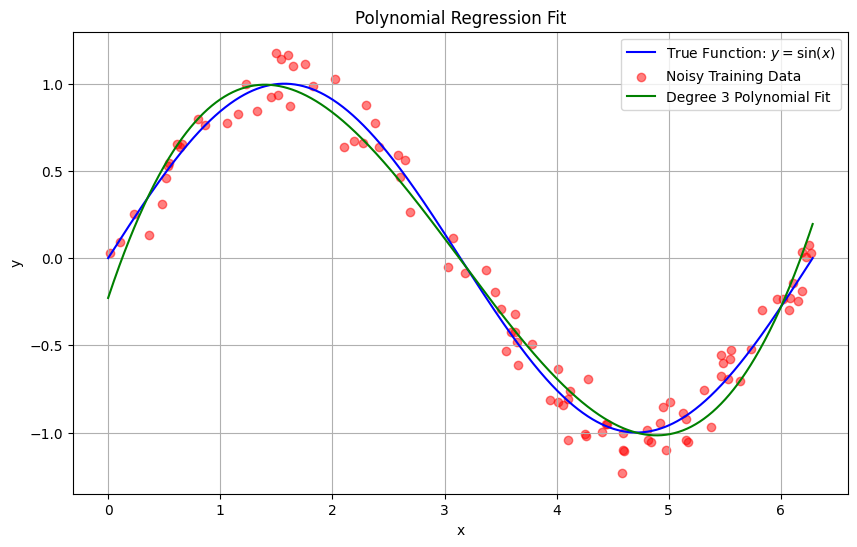

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x_plot, np.sin(x_plot), label=r"True Function: $y = \sin(x)$", color="blue")
plt.scatter(x, y, color="red", alpha=0.5, label="Noisy Training Data")
plt.plot(x_plot, y_plot, color="green", label=f"Degree {best_degree} Polynomial Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.show()